In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opti

'0.021456745656539752'

array([ 2.14567457e-02,  1.93644549e-04, -2.45846620e+04])

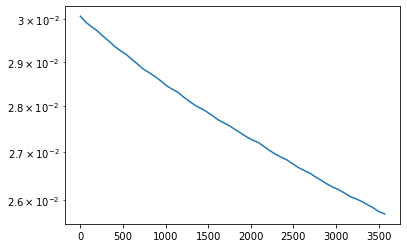

In [63]:
def exp_decay(x, a, b, timeshift):
    return np.exp(-(x - timeshift) * b) + a


data = pd.read_csv("Data/first_acc.csv", header=3).set_index("_time")
data.index = pd.to_datetime(data.index)
first_approach = data.loc["2022-11-24T13:24":"2022-11-24T14:24"]
first_approach.index = first_approach.index.astype(np.int64) // 10**9
first_approach.index = first_approach.index - first_approach.index[0]

# first_approach["int_time"] = data.index.apply(lambda x: x.total_seconds())
# first_approach["_value"].plot()
fit_para, fit_confidence = opti.curve_fit(
    exp_decay, first_approach.index, first_approach["_value"], [0.023, 0.001, 1]
)
display(f"{exp_decay(1e10, *fit_para)}")

x_values = first_approach.index
display(fit_para)
# plt.plot(x_values, exp_decay(first_approach.index, *fit_para))
plt.plot(x_values, first_approach["_value"])
plt.yscale("log")